## Workshop on Practical Data Analysis in Earth and Planetary Science. Seminar 2 

every Monday at 4pm (CEST), at the Center for Planetary Habitability (PHAB), Wegener's room (1st floor, ZEB-building) and everywhere in Zoom https://uio.zoom.us/j/61896722660, Meeting ID: 618 9672 2660

In the second workshop, we will contnue working with the examples from the introductory seminar, such as working with images and analyses of tabular data (linear regression). The learning goal is to look at the univariate statistics and different probability distributions (Chapter 3 of Martin Trauth's book can be useful). We will also try to use UiO ChatGPT service https://gpt.uio.no/chat to solve some problems and convert matlab codes to python and back.


### Univariate Statistics

Let's look with the image example from the introduction and estimate how much of the surface of earth is covered by the ocean

In [ ]:
websave('planet_img.jpg','https://www.solarsystemscope.com/textures/download/2k_earth_daymap.jpg')
I = imread('planet_img.jpg');
[I1,mycmap] = rgb2ind(I,8);
[nx,ny]=size(I);

lon=linspace(-180,180,nx);
lat=linspace(90,-90,ny);

figure, 
subplot(121),image(lon,lat,I1), set(gca,'Ydir','normal'), colormap(mycmap), c = colorbar; xlabel('longitude (^{o})'), ylabel('latitude (^{o})')
subplot(122),histogram(I1(:),'normalization','probability'), xlabel('land - ocean'), ylabel('probability')

In this Python code example, we fit the land-ocean distribution (8 colors) with a mixed Gassuian distribution. The recovered bimodal distribution of topography on Earth is indeed related to exitence of two types of crust: continental and oceanic. 

[0.60654517 0.39345483]
[[4.10294741]
 [0.48457243]]


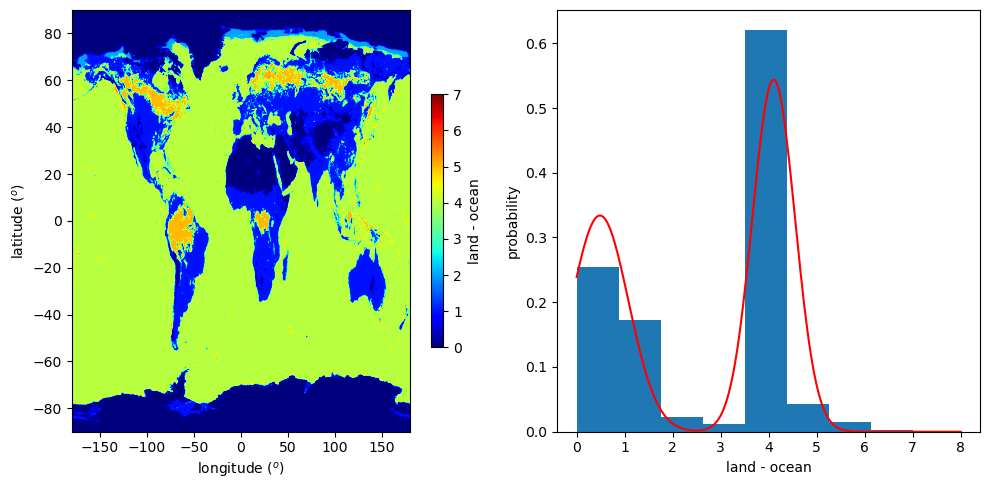

In [35]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.mixture import GaussianMixture
from scipy import stats

# Download the image from the specified URL
urllib.request.urlretrieve("https://www.solarsystemscope.com/textures/download/2k_earth_daymap.jpg", "planet_img.jpg")

# Load the image and convert to indexed image with 8 distinct colors
with Image.open("planet_img.jpg") as img:
        # Convert the image to indexed format using the PIL quantize method
        I1 = img.quantize(colors=8)
        
        # Extract the color palette from the converted image
        color_palette = I1.getpalette()[:8*3]
        color_palette = [color_palette[i:i+3] for i in range(0, len(color_palette), 3)]

# Get the size of the image and create latitude and longitude vectors
nx, ny, nz = I.shape
lon = np.linspace(-180, 180, nx)
lat = np.linspace(90, -90, ny)
I1a = np.array(I1)
# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(I1a, extent=[-180, 180, -90, 90], aspect="auto", cmap = 'jet')
axs[0].set_xlabel("longitude ($^{o}$)")
axs[0].set_ylabel("latitude ($^{o}$)")
axs[0].set_ylim(-90, 90)
axs[0].set_xlim(-180, 180)
cb = plt.colorbar(axs[0].images[0], ax=axs[0], shrink=0.6)
cb.set_label("land - ocean")
axs[1].hist(I1a.reshape(-1,1), bins=8, density=True)
axs[1].set_xlabel("land - ocean")
axs[1].set_ylabel("probability")
plt.tight_layout()
#plt.show()

gm = GaussianMixture(n_components=2,random_state=0).fit(I1a.reshape(-1,1))
print(gm.weights_)
print(gm.means_)
x = np.arange(0,8+1/30,1/30)
y1 = np.ravel(stats.norm.pdf(x,gm.means_[0],
    (gm.covariances_[0])**0.5))
y2 = np.ravel(stats.norm.pdf(x,gm.means_[1],
    (gm.covariances_[1])**0.5))

#%%
y1 = gm.weights_[0]*y1/np.trapz(y1,x)
y2 = gm.weights_[1]*y2/np.trapz(y2,x)

#%%
y = y1 + y2
#y = np.trapz(n,v)*y/np.trapz(y,x)

#%%
plt.plot(x,y,color='r')
plt.show()


In [12]:
#print(color_palette)

[[213, 211, 212], [90, 97, 81], [34, 58, 120], [30, 59, 121], [30, 59, 117], [37, 59, 83], [28, 58, 116], [34, 56, 96]]
